# **1.0. PROBLEM STATEMENT**

On this project we will be working on a Data Science process that will enable us give recomendations to the governmemnt on the distribution of support products to Persons with Albinism.In the analysis we will be required to determine whether the distibution of Support products is equitable and sufficient by solving the following questions.



1.   What is the distribution trend of sunscreen and support products to persons with albinism in all counties in the country?
2. What are the total products that were distributed per county?
3. What is the total number of products that was distributed overall?
4. What is the average distribution for each product and overall.
5. What is the overall individual usage?
6. Which county  has the highest number of PWA?
7. Which county has the highest distribution of sunscreen and support products?
8. Does the county with the highest number of PWA receive the highest distribution of sunscreen and support products?
9. Which county has  the lowest number of PWA?
10. Which county has the lowest distribution of sunscreen and support products?
11. Does  the county with the lowest number of PWA receive the lowest distribution of sunscreen and support products?
12. Which counties have a surplus supply
13. Which counties have deficit supply


# 1.1. SELECTING DATA

## **1.1.1 Importing libraries**

In [ ]:
#Importing Pandas 

import pandas as pd

#importing Numpy

import numpy as np

# importing tools for visualization

%matplotlib inline
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

In [ ]:
pip install chart_studio

In [ ]:
import chart_studio.plotly as py
# chart_studio.tools.set_credentials_file(username='glendah', api_key='N7CfwwPwPfdp2GLJjhSj')

1.1.2 Loading Data

In [ ]:
# A funtion that will help in reading the two data sets


def reading(type,path):
  if type == 'excel':
    df = pd.read_excel(path)
  elif type == 'csv':
    df = pd.read_csv(path)
  return df



In [ ]:
# Selcting the (distibution of sunscreen and support products) dataset

products = reading('csv', '/content/distribution_of_sunscreen_and_support_products_to_persons_with_albinism_pwas.csv')


In [ ]:
# Selecting the (Population of registered PWA 2019) dataset

population = reading('csv', '/content/distribution-of-persons-with-albinism-by-sex1-area-of-residence-county-and-sub-county-2019-censu (2).csv')

## 1.1.3Prevewing the datasets

In [ ]:
# Preview the first 5 record of (distibution of sunscreen and support products) dataset

products.head(5)

,County,Distribution_Centres_Hospitals/Health_Centres,Number_Of_Registered_Persons_With_Albinism,Distibuted_Sunscreen_Lotions,Distributed_Lip_Care_Products,Distributed_After_Sun_Lotions,Distributed_Protective_Clothings_Caps,Distributed_Protective_Clothings_Long_sleeved_T-Shirts,Financial_Year_Ending,Centroid_x,Centoid_Y,OBJECTID
0,Baringo,Baringo District Hospital,2.0,72.0,72.0,72.0,18.0,18.0,6/30/2017,35.946143,0.668986,0
1,Baringo,Marigat Referal,1.0,36.0,36.0,36.0,9.0,9.0,6/30/2017,35.946143,0.668986,1
2,Bomet,Bomet/Longisa District Hospital,28.0,1008.0,1008.0,1008.0,252.0,252.0,6/30/2017,35.271858,-0.828314,2
3,Bomet,Kapkatet,14.0,504.0,504.0,504.0,126.0,126.0,6/30/2017,35.271858,-0.828314,3
4,Bomet,Sigor,7.0,252.0,252.0,252.0,63.0,63.0,6/30/2017,35.271858,-0.828314,4


In [ ]:
# Preview the first 5 record of  (Population of registered PWA 2019) dataset

population.head(5)

,County/Sub County,Total Population,Unnamed: 2,Unnamed: 3,Persons With Albinism,Unnamed: 5,Unnamed: 6
0,NaN,Total*,Male,Female,Total*,Male,Female
1,KENYA,"47,213,282","23,315,538","23,896,364","9,729","4,467","5,261"
2,Rural,"32,615,723","16,121,886","16,493,031","7,470","3,414","4,055"
3,Urban,"14,597,559","7,193,652","7,403,333","2,259","1,053","1,206"
4,MOMBASA,"1,190,987","598,314","592,656",209,102,107


## 1.1.4. Checking information of the datasets

In [ ]:
# Checking the (distibution of sunscreen and support products) dataset size, shape and info

def size_shape(data):
    return data.info(), data.shape, data.size


size_shape(products)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   County                                                  209 non-null    object 
 1   Distribution_Centres_Hospitals/Health_Centres           209 non-null    object 
 2   Number_Of_Registered_Persons_With_Albinism              209 non-null    float64
 3   Distibuted_Sunscreen_Lotions                            209 non-null    float64
 4   Distributed_Lip_Care_Products                           209 non-null    float64
 5   Distributed_After_Sun_Lotions                           209 non-null    float64
 6   Distributed_Protective_Clothings_Caps                   209 non-null    float64
 7   Distributed_Protective_Clothings_Long_sleeved_T-Shirts  209 non-null    float64
 8   Financial_Year_Ending                   

(None, (210, 12), 2520)

In [ ]:
# Checking the (Population of registered PWA 2019) dataset size, shape and info

size_shape(population)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   County/Sub County      395 non-null    object
 1   Total Population       396 non-null    object
 2   Unnamed: 2             396 non-null    object
 3   Unnamed: 3             396 non-null    object
 4   Persons With Albinism  396 non-null    object
 5   Unnamed: 5             396 non-null    object
 6   Unnamed: 6             396 non-null    object
dtypes: object(7)
memory usage: 21.8+ KB


(None, (396, 7), 2772)

# 1.2. DATA CLEANING 

### 1.2.1. Cleaning the (distibution of sunscreen and support products) dataset

In [ ]:
# Validity

products.drop(columns=['Financial_Year_Ending', 'Centroid_x', 'Centoid_Y', 'OBJECTID'], inplace=True)
products

,County,Distribution_Centres_Hospitals/Health_Centres,Number_Of_Registered_Persons_With_Albinism,Distibuted_Sunscreen_Lotions,Distributed_Lip_Care_Products,Distributed_After_Sun_Lotions,Distributed_Protective_Clothings_Caps,Distributed_Protective_Clothings_Long_sleeved_T-Shirts
0,Baringo,Baringo District Hospital,2.0,72.0,72.0,72.0,18.0,18.0
1,Baringo,Marigat Referal,1.0,36.0,36.0,36.0,9.0,9.0
2,Bomet,Bomet/Longisa District Hospital,28.0,1008.0,1008.0,1008.0,252.0,252.0
3,Bomet,Kapkatet,14.0,504.0,504.0,504.0,126.0,126.0
4,Bomet,Sigor,7.0,252.0,252.0,252.0,63.0,63.0
...,...,...,...,...,...,...,...,...
205,Wajir,Sarman H Centre,51.0,1836.0,1836.0,1836.0,459.0,459.0
206,Wajir,Tarbaj District Hospital,4.0,144.0,144.0,144.0,36.0,36.0
207,Wajir,Wajir Referral Hospital,2.0,72.0,72.0,72.0,18.0,18.0
208,West Pokot,Kapenguria District Hospital,16.0,576.0,576.0,576.0,144.0,144.0


In [ ]:
# Accuracy
# Checking if the number of counties is 47

products.County.nunique()

47

In [ ]:
# Completeness
# Checking for null values

products.isnull().sum()

# drop null values

products.dropna(axis = 0, how ='any', inplace=True)
products.isnull().sum()

County                                                    0
Distribution_Centres_Hospitals/Health_Centres             0
Number_Of_Registered_Persons_With_Albinism                0
Distibuted_Sunscreen_Lotions                              0
Distributed_Lip_Care_Products                             0
Distributed_After_Sun_Lotions                             0
Distributed_Protective_Clothings_Caps                     0
Distributed_Protective_Clothings_Long_sleeved_T-Shirts    0
dtype: int64

In [ ]:
#Consistency
#Checking for duplicates

products.duplicated().sum()

# Thre are no duplicate records 

0

In [ ]:
# Uniformity
products.columns = ['County', 'Health_Centres', 'No_(PWA)_2018', 'Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts']
products

,County,Health_Centres,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts
0,Baringo,Baringo District Hospital,2.0,72.0,72.0,72.0,18.0,18.0
1,Baringo,Marigat Referal,1.0,36.0,36.0,36.0,9.0,9.0
2,Bomet,Bomet/Longisa District Hospital,28.0,1008.0,1008.0,1008.0,252.0,252.0
3,Bomet,Kapkatet,14.0,504.0,504.0,504.0,126.0,126.0
4,Bomet,Sigor,7.0,252.0,252.0,252.0,63.0,63.0
...,...,...,...,...,...,...,...,...
204,Wajir,Dambas H Centre,11.0,396.0,396.0,396.0,99.0,99.0
205,Wajir,Sarman H Centre,51.0,1836.0,1836.0,1836.0,459.0,459.0
206,Wajir,Tarbaj District Hospital,4.0,144.0,144.0,144.0,36.0,36.0
207,Wajir,Wajir Referral Hospital,2.0,72.0,72.0,72.0,18.0,18.0


## 1.2.1. Cleaning the (Population of registered PWA 2019) dataset

In [ ]:
population

,County/Sub County,Total Population,Unnamed: 2,Unnamed: 3,Persons With Albinism,Unnamed: 5,Unnamed: 6
0,NaN,Total*,Male,Female,Total*,Male,Female
1,KENYA,"47,213,282","23,315,538","23,896,364","9,729","4,467","5,261"
2,Rural,"32,615,723","16,121,886","16,493,031","7,470","3,414","4,055"
3,Urban,"14,597,559","7,193,652","7,403,333","2,259","1,053","1,206"
4,MOMBASA,"1,190,987","598,314","592,656",209,102,107
...,...,...,...,...,...,...,...
391,MAKADARA,"188,792","95,811","92,971",26,15,11
392,MATHARE,"204,469","105,047","99,408",32,18,14
393,NJIRU,"623,471","305,774","317,667",79,35,44
394,STAREHE,"194,726","96,858","97,858",27,13,14


In [ ]:
#validity

population['Total Population'] = population['Total Population'].str.replace(',', '')
population['Unnamed: 2'] = population['Unnamed: 2'].str.replace(',', '')
population['Unnamed: 3'] = population['Unnamed: 3'].str.replace(',', '')

population

,County/Sub County,Total Population,Unnamed: 2,Unnamed: 3,Persons With Albinism,Unnamed: 5,Unnamed: 6
0,NaN,Total*,Male,Female,Total*,Male,Female
1,KENYA,47213282,23315538,23896364,"9,729","4,467","5,261"
2,Rural,32615723,16121886,16493031,"7,470","3,414","4,055"
3,Urban,14597559,7193652,7403333,"2,259","1,053","1,206"
4,MOMBASA,1190987,598314,592656,209,102,107
...,...,...,...,...,...,...,...
391,MAKADARA,188792,95811,92971,26,15,11
392,MATHARE,204469,105047,99408,32,18,14
393,NJIRU,623471,305774,317667,79,35,44
394,STAREHE,194726,96858,97858,27,13,14


In [ ]:
# Completeness 
# Checking for null values

population.isnull().sum()

# Drop null values

population.dropna(axis = 0, how ='any', inplace=True)
population.isnull().sum()


County/Sub County        0
Total Population         0
Unnamed: 2               0
Unnamed: 3               0
Persons With Albinism    0
Unnamed: 5               0
Unnamed: 6               0
dtype: int64

In [ ]:
#Consistency
#Checking for duplicates

population.duplicated().sum()

# There are no duplicate records 

0

In [ ]:
#Uniformity
population.columns = ['County/Sub_County', 'Total_Pop', 'Male_Pop', 'Female_Pop', 'No_PWA()_2019', 'Total_Male_PWA', 'Total_Female_PWA']
population

,County/Sub_County,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA
1,KENYA,47213282,23315538,23896364,"9,729","4,467","5,261"
2,Rural,32615723,16121886,16493031,"7,470","3,414","4,055"
3,Urban,14597559,7193652,7403333,"2,259","1,053","1,206"
4,MOMBASA,1190987,598314,592656,209,102,107
5,CHANGAMWE,130541,67825,62716,25,15,10
...,...,...,...,...,...,...,...
391,MAKADARA,188792,95811,92971,26,15,11
392,MATHARE,204469,105047,99408,32,18,14
393,NJIRU,623471,305774,317667,79,35,44
394,STAREHE,194726,96858,97858,27,13,14


# 1.3. MERGING

In [ ]:
# For us to merge the dataset we fist have to modify our dataset
# we will use the county column to mergy the two datasets
# Using the  (Population of registered PWA 2019) dataset we have to extract the rows for counties, 

counties = ['MOMBASA', 'KWALE', 'KILIFI', 'TANA RIVER', 'LAMU', 'TAITA/TAVETA', 'GARISSA', 'WAJIR', 'MANDERA', 'MARSABIT', 'MACHAKOS', 'ISIOLO', 'MERU', 'THARAKA-NITHI', 'EMBU', 'KITUI', 'MAKUENI', 'NYANDARUA', 'NYERI', 'KIRINYAGA', "MURANG'A", 'KIAMBU', 'TURKANA', 'WEST POKOT', 'SAMBURU', 'TRANS NZOIA', 'UASIN GISHU', 'ELGEY/MARAKWET', 'NANDI', 'BARINGO', 'LAIKIPIA', 'NAKURU', 'NAROK', 'KAJIADO', 'KERICHO', 'BOMET', 'KAKAMEGA', 'VIHIGA', 'BUNGOMA', 'BUSIA', 'SIAYA', 'KISUMU', 'HOMA BAY', 'MIGORI', 'KISII', 'NYAMIRA', 'NAIROBI']

PopCounty = population[population['County/Sub_County'].isin(counties)]
PopCounty.reset_index(inplace=True)
PopCounty

# # After extracting counties we realised that there is some duplicates.  
# # In every duplicated values the last one is false so we have to keep the first and drop the last

PopCounty.drop_duplicates('County/Sub_County', keep='first', inplace= True)
PopCounty.reset_index(inplace=True)

# droping the index columns

PopCounty.drop(columns = ['level_0', 'index'], inplace=True)
PopCounty

,County/Sub_County,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA
0,MOMBASA,1190987,598314,592656,209,102,107
1,KWALE,858748,420556,438176,171,79,92
2,SAMBURU,200552,96443,104102,45,21,24
3,KILIFI,1440958,695879,745059,265,122,143
4,TANA RIVER,314710,157511,157197,82,52,30
5,LAMU,141909,74669,67237,17,8,9
6,TAITA/TAVETA,335747,169778,165963,79,36,43
7,GARISSA,835482,454437,381012,514,259,255
8,WAJIR,775302,411369,363886,122,66,56
9,MANDERA,862079,431285,430758,162,89,73


In [ ]:
# Changing Column names 

PopCounty.rename({'County/Sub_County': 'County'}, axis= 1, inplace = True)
PopCounty

,County,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA
0,MOMBASA,1190987,598314,592656,209,102,107
1,KWALE,858748,420556,438176,171,79,92
2,SAMBURU,200552,96443,104102,45,21,24
3,KILIFI,1440958,695879,745059,265,122,143
4,TANA RIVER,314710,157511,157197,82,52,30
5,LAMU,141909,74669,67237,17,8,9
6,TAITA/TAVETA,335747,169778,165963,79,36,43
7,GARISSA,835482,454437,381012,514,259,255
8,WAJIR,775302,411369,363886,122,66,56
9,MANDERA,862079,431285,430758,162,89,73


In [ ]:
#Grouping the (distibution of sunscreen and support products) datasetdistibution of sunscreen and support products) dataset

ProductsCounty = products.groupby('County').sum()
ProductsCounty.reset_index(inplace=True)
ProductsCounty

#Changing the (distibution of sunscreen and support products) dataset to upper case 
#to be similar eith the county column of the  (Population of registered PWA 2019) dataset

ProductsCounty['County'] = ProductsCounty['County'].str.upper()



In [ ]:
#From the above output on the naming of the counties we realise that some county names are spelled wrongly
#Correction: we will use dictionaries to make the changes

ProductsCounty
replacement_dict = {
    'E. MARKWET': 'ELGEY/MARAKWET',
    'TA TAVETA': 'TAITA/TAVETA',
    'THA NITHI': 'THARAKA-NITHI',
    'U- GISHU': 'UASIN GISHU',
    'TRANSNZOIA': 'TRANS NZOIA',
    'TAN RIVER': 'TANA RIVER',
    'MURANGA': "MURANG'A",
    'KIRINYGA': 'KIRINYAGA'

}

ProductsCounty.County.replace(replacement_dict, inplace=True)
ProductsCounty

,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts
0,BARINGO,3.0,108.0,108.0,108.0,27.0,27.0
1,BOMET,49.0,1764.0,1764.0,1764.0,441.0,441.0
2,BUNGOMA,229.0,8244.0,8244.0,8244.0,2061.0,2061.0
3,BUSIA,34.0,1224.0,1224.0,1224.0,306.0,306.0
4,ELGEY/MARAKWET,1.0,36.0,36.0,36.0,9.0,9.0
5,EMBU,39.0,1404.0,1404.0,1404.0,351.0,351.0
6,GARISSA,16.0,576.0,576.0,576.0,144.0,144.0
7,HOMA BAY,46.0,1656.0,1656.0,1656.0,414.0,414.0
8,ISIOLO,4.0,144.0,144.0,144.0,36.0,36.0
9,KAJIADO,42.0,1512.0,1512.0,1512.0,378.0,378.0


In [ ]:
ProductsCounty.to_csv('County_dis.csv')


In [ ]:
# Merging tables
# merged_df = ProductsCounty.merge(PopCounty, how='left', on='County')
# merged_df.head(5)

def merging(df, df1):
    merged_df = df.merge(df1, how='left', on='County')
    return merged_df

merging(ProductsCounty, PopCounty)

,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA
0,BARINGO,3.0,108.0,108.0,108.0,27.0,27.0,662760,333819,328929,76,44,32
1,BOMET,49.0,1764.0,1764.0,1764.0,441.0,441.0,873023,432591,440410,88,49,39
2,BUNGOMA,229.0,8244.0,8244.0,8244.0,2061.0,2061.0,1663898,808115,855749,481,212,269
3,BUSIA,34.0,1224.0,1224.0,1224.0,306.0,306.0,886856,421657,465171,314,143,171
4,ELGEY/MARAKWET,1.0,36.0,36.0,36.0,9.0,9.0,453403,226606,226785,46,20,26
5,EMBU,39.0,1404.0,1404.0,1404.0,351.0,351.0,604769,301491,303254,215,97,118
6,GARISSA,16.0,576.0,576.0,576.0,144.0,144.0,835482,454437,381012,514,259,255
7,HOMA BAY,46.0,1656.0,1656.0,1656.0,414.0,414.0,1125823,536085,589717,375,169,206
8,ISIOLO,4.0,144.0,144.0,144.0,36.0,36.0,267997,139510,128483,20,11,9
9,KAJIADO,42.0,1512.0,1512.0,1512.0,378.0,378.0,1107296,550146,557118,115,57,58


In [ ]:
#Converting floats and object datatypes to int datatype in the merged dataset


cols = ['No_(PWA)_2018', 'Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts', 'Total_Pop', 'Male_Pop', 'Female_Pop', 'No_PWA()_2019', 'Total_Male_PWA', 'Total_Female_PWA']
for col in cols:
   merged_df[col] = merged_df[col].apply(lambda x: int(x) if x == x else "")

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   County                         47 non-null     object 
 1   No_(PWA)_2018                  47 non-null     int64  
 2   Sunsreen_Lotions               47 non-null     int64  
 3   Lip_Care                       47 non-null     int64  
 4   AfterSun_Lotions               47 non-null     int64  
 5   Caps                           47 non-null     int64  
 6   Long_Sleeved_Tshirts           47 non-null     int64  
 7   Total_Pop                      47 non-null     int64  
 8   Male_Pop                       47 non-null     int64  
 9   Female_Pop                     47 non-null     int64  
 10  No_PWA()_2019                  47 non-null     int64  
 11  Total_Male_PWA                 47 non-null     int64  
 12  Total_Female_PWA               47 non-null     int64

# 1.4. ANALYSIS

## 1.4.1 To determine the total and average distribution for products


In [ ]:
# 1. What are the total products for each product that were distributed per county?

#Explanation:
#To get the sum on the distribution of each product  we use group by

products.groupby('County').sum().head(4)


,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts
County,,,,,,
Baringo,3.0,108.0,108.0,108.0,27.0,27.0
Bomet,49.0,1764.0,1764.0,1764.0,441.0,441.0
Bungoma,229.0,8244.0,8244.0,8244.0,2061.0,2061.0
Busia,34.0,1224.0,1224.0,1224.0,306.0,306.0


In [ ]:
# 2. What is the total number of products that was distributed overall per county (2018)?

ProductsCounty['Total_No_Products'] = ProductsCounty['Sunsreen_Lotions'] + ProductsCounty['Lip_Care'] + ProductsCounty['AfterSun_Lotions'] + ProductsCounty['Caps'] + ProductsCounty['Long_Sleeved_Tshirts']


ProductsCounty[['County', 'Total_No_Products']].head()

,County,Total_No_Products
0,BARINGO,378.0
1,BOMET,6174.0
2,BUNGOMA,28854.0
3,BUSIA,4284.0
4,ELGEY/MARAKWET,126.0


In [ ]:
# 3.  How many products were distributed (2018)

ProductsCounty['Total_No_Products'].sum()

397278.0

In [ ]:
# 4. What is the average distribution overall


ProductsCounty['Total_No_Products'].mean()

8452.72340425532

In [ ]:
# 5. The total number of PWA (2018)
merged_df['No_(PWA)_2018'].sum()

3153

In [ ]:
# 6. The total number of PWA (2019)

merged_df['No_PWA()_2019'].sum()

9738

In [ ]:
# 7. The total persentage increase for PWA 

overal_percentage = ((merged_df['No_PWA()_2019'].sum() - merged_df['No_(PWA)_2018'].sum()) / merged_df['No_(PWA)_2018'].sum()) * 100
overal_percentage

208.848715509039

## 1.4.2 To establish whether  the county with the highest number of PWA is the one that received highest distribution of sunscreen and support products


In [ ]:
# 1. What is the average distribution for each product per product.

avg_p = ProductsCounty[['Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts']].mean()
avg_p

Sunsreen_Lotions        2415.063830
Lip_Care                2415.063830
AfterSun_Lotions        2415.063830
Caps                     603.765957
Long_Sleeved_Tshirts     603.765957
dtype: float64

In [ ]:
# 2. The total number of products distributed per county

merged_df['Total_No_Products'] = merged_df['Sunsreen_Lotions'] + merged_df['Lip_Care'] + merged_df['AfterSun_Lotions'] + merged_df['Caps'] + merged_df['Long_Sleeved_Tshirts']

merged_df.head(3)

,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0


In [ ]:
# 3. Which 5 counties has the highest number of PWA (2018)?

products.groupby('County')['No_(PWA)_2018'].sum().sort_values(ascending=False).head()



County
Kisii       320.0
Bungoma     229.0
Kakamega    210.0
Kiambu      153.0
Kitui       135.0
Name: No_(PWA)_2018, dtype: float64

In [ ]:
# 4. Which 5 county has the highest distribution of sunscreen and support products?

ProductsCounty.groupby('County')['Total_No_Products'].sum().sort_values(ascending=False).head(5)

County
KISII       40320.0
BUNGOMA     28854.0
KAKAMEGA    26460.0
KIAMBU      19278.0
KITUI       17010.0
Name: Total_No_Products, dtype: float64

In [ ]:
# 5. Which 5 counties recieved highest number of Long Sleeved Tshirts?

ProductsCounty.groupby('County')['Long_Sleeved_Tshirts'].sum().sort_values(ascending=False).head()

County
KISII       2880.0
BUNGOMA     2061.0
KAKAMEGA    1890.0
KIAMBU      1377.0
KITUI       1215.0
Name: Long_Sleeved_Tshirts, dtype: float64

In [ ]:
# 6. Which 5 counties recieved highest number of Lip Care?

ProductsCounty.groupby('County')['Lip_Care'].sum().sort_values(ascending=False).head()

County
KISII       11520.0
BUNGOMA      8244.0
KAKAMEGA     7560.0
KIAMBU       5508.0
KITUI        4860.0
Name: Lip_Care, dtype: float64

In [ ]:
# 8. Which 5 counties has the highest number of PWA (2019)

merged_df[['County', 'No_PWA()_2019']].sort_values(by='No_PWA()_2019', ascending=False).head(5)

,County,No_PWA()_2019
10,KAKAMEGA,568
25,MERU,563
29,NAIROBI,525
6,GARISSA,514
2,BUNGOMA,481


In [ ]:
# 8. The percentage increase of PWA per county

merged_df['percentage'] = ((merged_df['No_PWA()_2019'] - merged_df['No_(PWA)_2018']) / merged_df['No_(PWA)_2018']) *100
merged_df[['County', 'No_(PWA)_2018', 'No_PWA()_2019', 'percentage']]


,County,No_(PWA)_2018,No_PWA()_2019,percentage
0,BARINGO,3,76,2433.333333
1,BOMET,49,88,79.591837
2,BUNGOMA,229,481,110.043668
3,BUSIA,34,314,823.529412
4,ELGEY/MARAKWET,1,46,4500.000000
5,EMBU,39,215,451.282051
6,GARISSA,16,514,3112.500000
7,HOMA BAY,46,375,715.217391
8,ISIOLO,4,20,400.000000
9,KAJIADO,42,115,173.809524


## etst

In [ ]:
#1. The estimated number of sunscreen lotions per county

merged_df['Estmated_Sunscreen'] = (merged_df['Sunsreen_Lotions'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']

merged_df.head()


,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


In [ ]:
# The estimated number of Lip Care per county

merged_df['Estmated_Lip_Care'] = (merged_df['Lip_Care'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']

merged_df.head()


,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


In [ ]:
# The estimated number of AfterSun Lotions county

merged_df['Estmated_AfterSun_Lotions'] = (merged_df['AfterSun_Lotions'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']

merged_df.head()

,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


In [ ]:
# The estimated number of Caps per county

merged_df['Estmated_Caps'] = (merged_df['Caps'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']

merged_df.head()


,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


In [ ]:
# The estimated number of Long Sleeved Tshirts per county

merged_df['Estmated_Long Sleeved_Tshirts'] = (merged_df['Long_Sleeved_Tshirts'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']

merged_df.head()


,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


In [ ]:
# The estimated Total distribution per county

merged_df['Estimated_Total_No_Products'] = (merged_df['Total_No_Products'] / merged_df['No_(PWA)_2018']) * merged_df['No_PWA()_2019']
merged_df.head()

,County,No_(PWA)_2018,Sunsreen_Lotions,Lip_Care,AfterSun_Lotions,Caps,Long_Sleeved_Tshirts,Total_Pop,Male_Pop,Female_Pop,No_PWA()_2019,Total_Male_PWA,Total_Female_PWA,Total_No_Products,percentage,Estmated_Sunscreen,Estmated_Lip_Care,Estmated_AfterSun_Lotions,Estmated_Caps,Estmated_Long Sleeved_Tshirts,Estimated_Total_No_Products
0,BARINGO,3,108,108,108,27,27,662760,333819,328929,76,44,32,378,2433.333333,2736.0,2736.0,2736.0,684.0,684.0,9576.0
1,BOMET,49,1764,1764,1764,441,441,873023,432591,440410,88,49,39,6174,79.591837,3168.0,3168.0,3168.0,792.0,792.0,11088.0
2,BUNGOMA,229,8244,8244,8244,2061,2061,1663898,808115,855749,481,212,269,28854,110.043668,17316.0,17316.0,17316.0,4329.0,4329.0,60606.0
3,BUSIA,34,1224,1224,1224,306,306,886856,421657,465171,314,143,171,4284,823.529412,11304.0,11304.0,11304.0,2826.0,2826.0,39564.0
4,ELGEY/MARAKWET,1,36,36,36,9,9,453403,226606,226785,46,20,26,126,4500.000000,1656.0,1656.0,1656.0,414.0,414.0,5796.0


## 1.4.3 To access  whether  the county with the lowest number of PWA is the one that received lowest distribution of sunscreen and support products


In [ ]:
# 1. Which 5 counties has the lowest number of PWA 2018?

products.groupby('County')['No_(PWA)_2018'].sum().sort_values(ascending=True).head()

County
E. Markwet    1.0
Baringo       3.0
Samburu       3.0
Isiolo        4.0
Marsabit      6.0
Name: No_(PWA)_2018, dtype: float64

In [ ]:
# 2. Which 5 counties has the lowest number of dictributed products 2018?

ProductsCounty.groupby('County')['Total_No_Products'].sum().sort_values(ascending=True).head()


County
ELGEY/MARAKWET    126.0
BARINGO           378.0
SAMBURU           378.0
ISIOLO            504.0
MARSABIT          756.0
Name: Total_No_Products, dtype: float64

In [ ]:
# 3. The county with the lowest number of PWA 2019
merged_df[['County', 'No_PWA()_2019']].sort_values(by='No_PWA()_2019', ascending=True).head(5)

,County,No_PWA()_2019
20,LAMU,17
8,ISIOLO,20
24,MARSABIT,29
19,LAIKIPIA,44
36,SAMBURU,45


## 1.4.4To establish whether the counties with the highest number of PWA is the one that has the highest of health care centers

In [ ]:
# The counties with the highest number of health care centers. 

products.groupby('County')['Health_Centres'].count().sort_values(ascending = False)

County
Kwale         20
Kilifi        16
Kisii          9
Bungoma        9
Homa Bay       7
Kakamega       7
Makueni        7
Nyamira        7
Kajiado        6
Kitui          6
Machakos       6
Siaya          6
Kisumu         5
Meru           5
Nakuru         5
Narok          5
Nyandarua      5
Nandi          4
Kirinyga       4
Tan River      4
Lamu           4
Kericho        4
Nyeri          4
Wajir          4
Busia          4
Embu           4
Mombasa        4
Kiambu         4
Laikipia       3
Tha Nithi      3
Bomet          3
Baringo        2
Migori         2
Muranga        2
Nairobi        2
Ta Taveta      2
Transnzoia     2
Turkana        2
Vihiga         2
Garissa        2
E. Markwet     1
West Pokot     1
Isiolo         1
Marsabit       1
Samburu        1
U- Gishu       1
Mandera        1
Name: Health_Centres, dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   County                         47 non-null     object 
 1   No_(PWA)_2018                  47 non-null     int64  
 2   Sunsreen_Lotions               47 non-null     int64  
 3   Lip_Care                       47 non-null     int64  
 4   AfterSun_Lotions               47 non-null     int64  
 5   Caps                           47 non-null     int64  
 6   Long_Sleeved_Tshirts           47 non-null     int64  
 7   Total_Pop                      47 non-null     int64  
 8   Male_Pop                       47 non-null     int64  
 9   Female_Pop                     47 non-null     int64  
 10  No_PWA()_2019                  47 non-null     int64  
 11  Total_Male_PWA                 47 non-null     int64  
 12  Total_Female_PWA               47 non-null     int64

# **1.5 VISUALIZATION**

Text(0.5, 1.0, 'INCREASE IN NUMBER OF PWA 2018/2019')

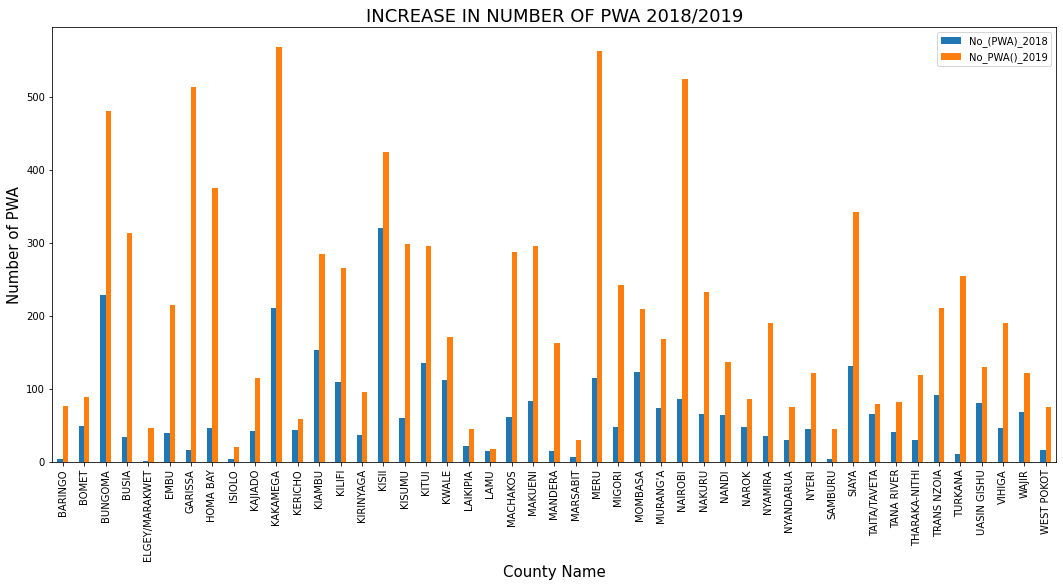

In [ ]:
# A bar graph to cho the increase in number of persons with albinisn in the 2018/2019
#

merged_df.plot(kind= 'bar', x = 'County', y=['No_(PWA)_2018', 'No_PWA()_2019'], figsize=(18,8))

plt.xlabel('County Name', fontsize = (15))
plt.ylabel("Number of PWA", fontsize = (15))
plt.title("INCREASE IN NUMBER OF PWA 2018/2019", fontsize = (18))

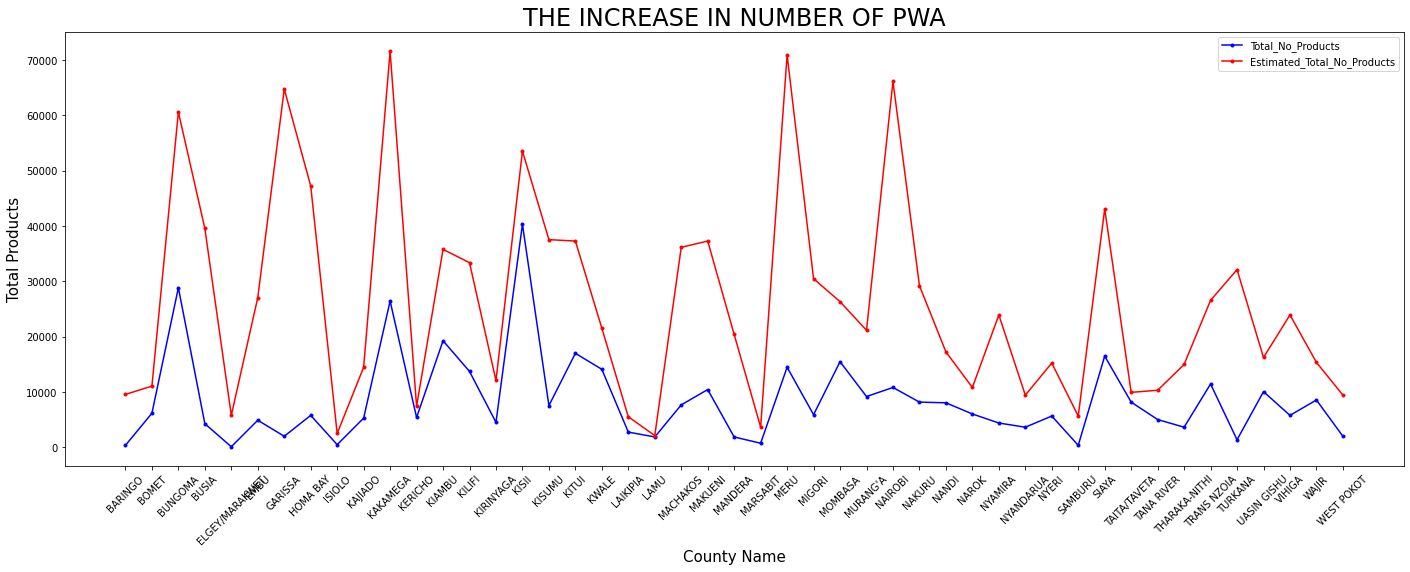

In [ ]:
# A line graph to show the estimation of the products that should be distributed


plt.figure(figsize = (24,8))

plt.title('THE INCREASE IN NUMBER OF PWA', fontsize=24)

plt.plot(merged_df['County'], merged_df['Total_No_Products'], 'b.-', label= 'Total_No_Products')
plt.plot(merged_df['County'], merged_df['Estimated_Total_No_Products'], 'r.-', label='Estimated_Total_No_Products')

plt.xlabel('County Name', fontsize=(15))
plt.ylabel("Total Products", fontsize = (15))

plt.legend()

plt.xticks(rotation = 45)



plt.show()

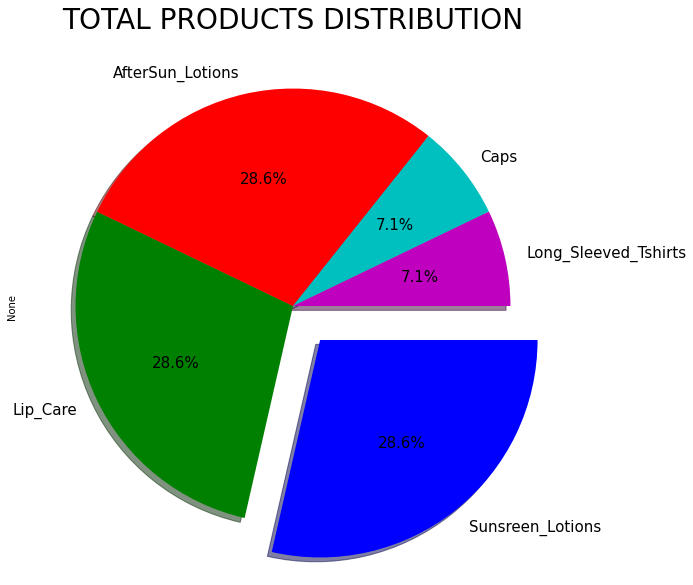

In [ ]:
# A Pie showing the total distribution per production

explode = ([0.2, 0, 0, 0, 0])

plot = merged_df[['Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts']].sum().plot.pie(y= 'Sunsreen_Lotions', 
                                                                                                                      
figsize=(16, 10), colors = ['b', 'g', 'r', 'c', 'm'], 
labels = ['Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts'],

fontsize=15, explode=explode, autopct='%1.1f%%',counterclock=False, shadow=True)

plt.title('TOTAL PRODUCTS DISTRIBUTION', fontsize=28)


labels= ['Sunsreen_Lotions', 'Lip_Care', 'AfterSun_Lotions', 'Caps', 'Long_Sleeved_Tshirts']





